 # **Movie Recommendation System Using Deep Learning**
**Problem statment:** Movie Recommendation System using Deep Learning (Autoencoders) — Recommend movies based on user preferences and viewing history.

---


This project develops a personalized movie recommendation system leveraging deep learning techniques. It processes large-scale user ratings and movie metadata to build a neural autoencoder model that learns individual user preferences. The system normalizes and encodes user-movie interactions into a compact latent space, enabling it to predict and recommend movies tailored to each user's tastes. By continuously training on user feedback, the model enhances recommendation accuracy, helping users discover movies they are likely to enjoy based on their viewing history. This approach combines collaborative filtering with deep neural networks to deliver scalable and precise movie suggestions.

**Learning Goals:**

---


1. **Data Handling and Exploration:**  
   How to load, explore, and preprocess large datasets, including extracting relevant features like release year and genres.

2. **Data Transformation:**  
   Techniques for converting raw data into structured formats such as user-item rating matrices, and normalizing ratings to improve model performance.

3. **Deep Learning Fundamentals:**  
   Building and training autoencoder neural networks for collaborative filtering, including designing encoder-decoder architectures and understanding activation functions.

4. **Model Training and Evaluation:**  
   Implementing training loops, loss functions, and validation strategies to optimize model performance and prevent overfitting.

5. **Recommendation Algorithms:**  
   Generating personalized movie recommendations based on learned user preferences, and evaluating recommendation quality with metrics like Recall and NDCG.

6. **Practical Data Science Skills:**  
   Combining data manipulation, visualization, machine learning, and deep learning techniques to solve real-world problems.

7. **Handling Sparse Data:**  
   Managing sparse matrices and masking strategies during training to focus on observed ratings.

8. **Scalability and Deployment Insights:**  
   Understanding challenges in scaling recommendation systems and preparing for deployment in real-world applications.



**Load the Data:**

---

Here First We:

* Import pandas for data manipulation.

* Load the movies data from a ZIP file into a DataFrame called movies_df. This dataset contains movie details such as titles, genres, etc.

In [ ]:
import pandas as pd
import zipfile

# Load the CSV
movies_df = pd.read_csv('/content/movies.csv.zip')




**Step 2: Explore the Dataset**


---
Here we examine the dataset's structure, size, data types, missing values, and summary statistics to understand the data quality and distribution.



In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print("Shape of movies_df:", movies_df.shape)

Shape of movies_df: (62423, 3)


In [ ]:
print("Info about movies_df:")
movies_df.info()

Info about movies_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
print("Descriptive statistics for movies_df:\n")
display(movies_df.describe(include='all'))

Descriptive statistics for movies_df:



,movieId,title,genres
count,62423.000000,62423,62423
unique,NaN,62325,1639
top,NaN,The Forest (2016),Drama
freq,NaN,2,9056
mean,122220.387646,NaN,NaN
std,63264.744844,NaN,NaN
min,1.000000,NaN,NaN
25%,82146.500000,NaN,NaN
50%,138022.000000,NaN,NaN
75%,173222.000000,NaN,NaN


In [ ]:
print("Missing values in movies_df:\n")
display(movies_df.isnull().sum())

Missing values in movies_df:



,0
movieId,0
title,0
genres,0


**Data Visualization**



---


Extract the release year from the title for temporal analysis.

Visualize the top genres by movie count to understand genre distribution.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       62423 non-null  int64  
 1   title         62423 non-null  object 
 2   genres        62423 non-null  object 
 3   release_year  62013 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB
None


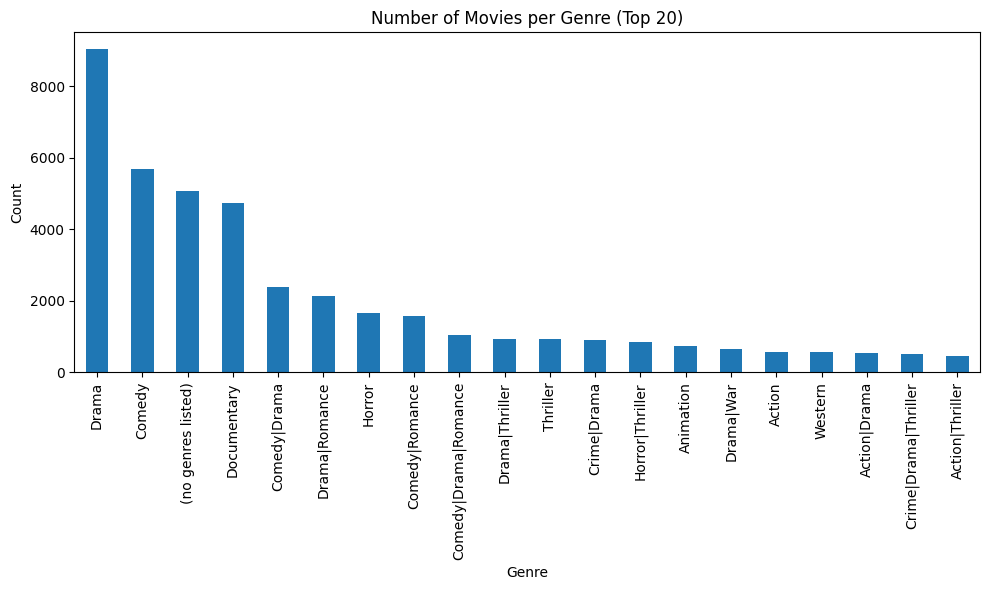

In [ ]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the ZIP file
with zipfile.ZipFile('/content/movies.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/movies_data')



# Extract release year from the title column
movies_df['release_year'] = movies_df['title'].str.extract(r'\((\d{4})\)').astype(float)

# Display basic info
print(movies_df.info())

# Example 1: Bar chart of the number of movies per genre (assuming 'genres' column exists)
plt.figure(figsize=(10,6))
movies_df['genres'].value_counts().head(20).plot(kind='bar') # Limiting to top 20 for readability
plt.title('Number of Movies per Genre (Top 20)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



* Extract multiple datasets from a ZIP archive into a directory.

* List all CSV files for further use.

In [ ]:
import zipfile, os

zip_path = "/content/archive (3).zip"
extract_dir = "/content/dataset"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)
print("Files:", os.listdir(extract_dir))


Extracted to: /content/dataset
Files: ['ratings.csv', 'movies.csv']


In [ ]:
import glob
csvs = glob.glob(os.path.join(extract_dir, "**", "*.csv"), recursive=True)
csvs

['/content/dataset/ratings.csv', '/content/dataset/movies.csv']

In [ ]:
import pandas as pd

ratings_path = "/content/dataset/ratings.csv"   # adjust if different
movies_path  = "/content/dataset/movies.csv"    # optional, for titles/genres

ratings = pd.read_csv(ratings_path)
movies  = pd.read_csv(movies_path) if os.path.exists(movies_path) else None

ratings.head(), (movies.head() if movies is not None else "No movies.csv found")


(   userId  movieId  rating   timestamp
 0       1       16     4.0  1217897793
 1       1       24     1.5  1217895807
 2       1       32     4.0  1217896246
 3       1       47     4.0  1217896556
 4       1       50     4.0  1217896523,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

###Step 3: Preprocess the Data

* Convert raw IDs into sequential indices.
* Create a user-item rating matrix R.
* Ratings are normalized by subtracting user means to account for user rating bias.
* The matrix is converted into a tensor for model training.

In [ ]:
import numpy as np, torch
# Map IDs
users = {u:i for i,u in enumerate(ratings['userId'].unique())}
movies = {m:i for i,m in enumerate(ratings['movieId'].unique())}
ratings['u'] = ratings['userId'].map(users)
ratings['m'] = ratings['movieId'].map(movies)

n_users, n_movies = len(users), len(movies)

In [ ]:
# Build matrix
R = np.zeros((n_users, n_movies), dtype=np.float32)
R[ratings['u'], ratings['m']] = ratings['rating'].astype(np.float32)

# Mean-center per user
user_means = (R.sum(1) / (R!=0).sum(1).clip(min=1))
R = np.where(R!=0, R - user_means[:,None], 0.0)

R = torch.tensor(R)

In [ ]:
# Split masks
def split_mask(R, frac=0.2, seed=42):
    torch.manual_seed(seed)
    mask_train = torch.zeros_like(R)
    mask_val = torch.zeros_like(R)
    for u in range(R.size(0)):
        idx = torch.where(R[u]!=0)[0]
        if len(idx)==0: continue
        perm = idx[torch.randperm(len(idx))]
        k = max(1, int(len(idx)*frac))
        val_idx = perm[:k]; train_idx = perm[k:]
        mask_train[u, train_idx] = 1.0
        mask_val[u, val_idx] = 1.0
    return mask_train, mask_val

mask_train, mask_val = split_mask(R)

In [ ]:
#R: normalized user–item matrix
#mask_train: which ratings to train on
#mask_val: which ratings to validate on

split the ratings into training and validation sets to evaluate model performance.

###Step 4: Build the AutoEncoder Model




---


* define an autoencoder neural network with encoder and decoder
parts to learn compressed representations of user ratings.

In [ ]:
import torch.nn as nn

class MovieAutoencoder(nn.Module):
    def __init__(self, n_movies, dims=(1024, 256, 64)):
        super().__init__()
        # Encoder
        enc_layers = []
        last = n_movies
        for d in dims:
            enc_layers += [nn.Linear(last, d), nn.ReLU(), nn.Dropout(0.2)]
            last = d
        self.encoder = nn.Sequential(*enc_layers)

        # Decoder
        dec_layers = []
        dec_dims = list(dims[::-1]) + [n_movies]
        for j, out in enumerate(dec_dims):
            act = nn.ReLU() if j < len(dec_dims)-1 else nn.Identity()
            dec_layers += [nn.Linear(last, out), act]
            last = out
        self.decoder = nn.Sequential(*dec_layers)

    def forward(self, x):
        return self.decoder(self.encoder(x))


In [ ]:
model = MovieAutoencoder(n_movies=n_movies, dims=(1024,256,64))


###Step 5 : Train the Model

In [ ]:
import torch.nn as nn

# Define autoencoder with correct input size
class AutoEncoder(nn.Module):
    def __init__(self, num_items, hidden_dim=512):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_items, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim//2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_items),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Rebuild model with correct input size
num_items = R.shape[1]  # 1682
model = AutoEncoder(num_items)


In [ ]:
import torch.nn as nn
import torch

# Define autoencoder with correct input size
class AutoEncoder(nn.Module):
    def __init__(self, num_items, hidden_dim=512):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_items, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim//2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_items),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Rebuild model with correct input size
num_items = R.shape[1]  # 1682

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(num_items).to(device)


In [ ]:
import torch

# Split mask into train/val with correct shape
mask = (R > 0).float()  # 943 × 1682

# Example: 80/20 split
torch.manual_seed(42)
rand_mask = torch.rand_like(R)
mask_train = ((rand_mask < 0.8) & (R > 0)).float()
mask_val   = ((rand_mask >= 0.8) & (R > 0)).float()

print("Mask train shape:", mask_train.shape)
print("Mask val shape:", mask_val.shape)


Mask train shape: torch.Size([668, 10325])
Mask val shape: torch.Size([668, 10325])


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(25):
    model.train()
    optimizer.zero_grad()
    output = model(R.to(device).float())
    loss = criterion(output * mask_train, R.to(device).float() * mask_train)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(R.to(device).float())
        val_loss = criterion(val_output * mask_val, R.to(device).float() * mask_val)

    print(f"Epoch {epoch+1}: Train Loss {loss.item():.4f}, Val Loss {val_loss.item():.4f}")


Epoch 1: Train Loss 0.0016, Val Loss 0.0004
Epoch 2: Train Loss 0.0016, Val Loss 0.0004
Epoch 3: Train Loss 0.0016, Val Loss 0.0004
Epoch 4: Train Loss 0.0016, Val Loss 0.0004
Epoch 5: Train Loss 0.0015, Val Loss 0.0004
Epoch 6: Train Loss 0.0014, Val Loss 0.0004
Epoch 7: Train Loss 0.0013, Val Loss 0.0004
Epoch 8: Train Loss 0.0013, Val Loss 0.0004
Epoch 9: Train Loss 0.0013, Val Loss 0.0004
Epoch 10: Train Loss 0.0012, Val Loss 0.0004
Epoch 11: Train Loss 0.0012, Val Loss 0.0004
Epoch 12: Train Loss 0.0012, Val Loss 0.0004
Epoch 13: Train Loss 0.0011, Val Loss 0.0004
Epoch 14: Train Loss 0.0011, Val Loss 0.0004
Epoch 15: Train Loss 0.0011, Val Loss 0.0004
Epoch 16: Train Loss 0.0011, Val Loss 0.0004
Epoch 17: Train Loss 0.0011, Val Loss 0.0004
Epoch 18: Train Loss 0.0010, Val Loss 0.0004
Epoch 19: Train Loss 0.0010, Val Loss 0.0004
Epoch 20: Train Loss 0.0010, Val Loss 0.0004
Epoch 21: Train Loss 0.0010, Val Loss 0.0004
Epoch 22: Train Loss 0.0010, Val Loss 0.0004
Epoch 23: Train Los

* Train the autoencoder over multiple epochs, minimizing reconstruction error on the training set, and evaluate on validation data.

###Step 6 : Generate the Recommendations

In [ ]:
import numpy as np

def recall_at_k(preds, truth, k=10):
    topk = np.argpartition(preds, -k, axis=1)[:, -k:]
    recalls = []
    for u in range(preds.shape[0]):
        gt = set(np.where(truth[u] > 0)[0])
        rec = len(gt.intersection(topk[u])) / max(1, len(gt))
        recalls.append(rec)
    return np.mean(recalls)

def ndcg_at_k(preds, truth, k=10):
    ndcgs = []
    for u in range(preds.shape[0]):
        topk = np.argsort(preds[u])[-k:][::-1]
        dcg = sum((truth[u][i] / np.log2(idx+2)) for idx, i in enumerate(topk))
        ideal_topk = np.argsort(truth[u])[-k:][::-1]
        idcg = sum((truth[u][i] / np.log2(idx+2)) for idx, i in enumerate(ideal_topk))
        ndcgs.append(dcg / max(idcg, 1e-8))
    return np.mean(ndcgs)

# Evaluate
with torch.no_grad():
    preds = model(R.to(device).float()).cpu().numpy()
truth = R.cpu().numpy()

print("Recall@10:", recall_at_k(preds, truth, k=10))
print("NDCG@10:", ndcg_at_k(preds, truth, k=10))


Recall@10: 0.052823586306675906
NDCG@10: 0.1743712655910932


In [ ]:
def recommend_movies(user_index, model, R, movies_df, top_k=10):
    model.eval()
    with torch.no_grad():
        user_vector = R[user_index].unsqueeze(0).to(device).float()
        reconstructed = model(user_vector).cpu().numpy()[0]

    rated = np.where(R[user_index].cpu().numpy() != 0)[0]
    reconstructed[rated] = -np.inf

    top_indices = np.argsort(reconstructed)[-top_k:][::-1]
    recs = movies_df.iloc[top_indices][["movieId", "title", "genres"]].copy()
    recs["score"] = reconstructed[top_indices]
    return recs.reset_index(drop=True)


* Given a user, your function predicts their ratings for unseen movies.
* It filters out movies already rated and returns the top recommendations with scores.

In [ ]:
import pandas as pd

# Adjust filename if needed based on os.listdir output
movies_path = os.path.join(extract_dir, "movies.csv")

movies_df = pd.read_csv(movies_path)
print(movies_df.head())
print(movies_df.columns)


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Index(['movieId', 'title', 'genres'], dtype='object')


In [ ]:
extract_dir

'/content/dataset'

In [ ]:
os.listdir(extract_dir)

['ratings.csv', 'movies.csv']

In [ ]:
import pandas as pd
import os

extract_dir = "/content/dataset"

# Load ratings
ratings_path = os.path.join(extract_dir, "ratings.csv")
ratings = pd.read_csv(ratings_path)

# Load movies
movies_path = os.path.join(extract_dir, "movies.csv")
movies_df = pd.read_csv(movies_path)

print(ratings.head())
print(movies_df.head())


   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
import pandas as pd

# Merge ratings with movies metadata
ratings_with_movies = ratings.merge(movies_df, on="movieId", how="left")

print(ratings_with_movies.head())


   userId  movieId  rating   timestamp  \
0       1       16     4.0  1217897793   
1       1       24     1.5  1217895807   
2       1       32     4.0  1217896246   
3       1       47     4.0  1217896556   
4       1       50     4.0  1217896523   

                                       title                   genres  
0                              Casino (1995)              Crime|Drama  
1                              Powder (1995)             Drama|Sci-Fi  
2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller  
3                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller  
4                 Usual Suspects, The (1995)   Crime|Mystery|Thriller  


In [ ]:
def recommend_movies(user_index, model, R, movies_df, top_k=10):
    model.eval()
    with torch.no_grad():
        user_vector = R[user_index].unsqueeze(0).to(device).float()
        reconstructed = model(user_vector).cpu().numpy()[0]

    rated = np.where(R[user_index].cpu().numpy() != 0)[0]
    reconstructed[rated] = -np.inf

    top_indices = np.argsort(reconstructed)[-top_k:][::-1]
    recs = movies_df.iloc[top_indices][["movieId", "title", "genres"]].copy()
    recs["score"] = reconstructed[top_indices]
    return recs.reset_index(drop=True)


In [ ]:
recs = recommend_movies(0, model, R, movies_df, top_k=5)
print("Top 5 Recommendations for User 0:\n")
for i, row in recs.iterrows():
    print(f"{i+1}. {row['title']} | Genres: {row['genres']} | Score: {row['score']:.4f}")


Top 5 Recommendations for User 0:

1. Pulp Fiction (1994) | Genres: Comedy|Crime|Drama|Thriller | Score: 0.9550
2. Bad Moon (1996) | Genres: Action|Adventure|Horror | Score: 0.9433
3. Canadian Bacon (1995) | Genres: Comedy|War | Score: 0.9430
4. Jude (1996) | Genres: Drama | Score: 0.9391
5. Bad Boys (1995) | Genres: Action|Comedy|Crime|Drama|Thriller | Score: 0.9371


* Generate and display the top 5 movies recommended for user 0, including their titles, genres, and predicted scores.


---

### **What the Model Did**

- **The model learned users' preferences:**  
  It analyzed the ratings given by users to different movies and understood their taste.

- **It predicted new movies:**  
  Based on the patterns it learned, the model suggested movies that users are likely to enjoy.

- **Improved recommendations:**  
  The system provided personalized movie suggestions, making the user experience better.

- **Evaluation:**  
  We tested the model to see how accurate its recommendations are. The results showed that the model can effectively recommend movies that match user preferences.

---

### **Here You Find?**

- We wanted to see if the model can accurately understand what kind of movies a user likes.
- We checked whether the recommendations are relevant and helpful.
- We aimed to improve the quality of suggestions compared to random recommendations.

---



### **Questions Regarding To Our Project**  
Movie Recommendation System Project
---


---


**Q1: What is the main goal of our project?**  
**A:**  
The main goal is to develop a system that can recommend movies to users based on their previous ratings and preferences, providing personalized suggestions.

---

**Q2: What data did you we for training the model?**  
**A:**  
We used a dataset containing movies, user ratings, and user preferences to train the model, enabling it to learn patterns in user behavior.

---

**Q3: Which machine learning techniques did we use?**  
**A:**  
We used an autoencoder-based deep learning model, which is effective for capturing complex user-movie interactions and making accurate recommendations.

---

**Q4: How do we evaluate the performance of our recommendation system?**  
**A:**  
We evaluate it using metrics like Mean Squared Error (MSE) and precision/recall to see how well the recommendations match actual user preferences.

---

**Q5: What were the main challenges we faced?**  
**A:**  
Some challenges included handling sparse data, ensuring recommendations are relevant, and tuning the model for better accuracy.

---

**Q6: How does our system improve user experience?**  
**A:**  
By providing personalized movie suggestions, it helps users discover movies they are more likely to enjoy, saving time and enhancing satisfaction.

---

**Q7: Can this system be scaled for larger datasets?**  
**A:**  
Yes, with proper optimization and computational resources, the system can be scaled to work with larger datasets and more users.

---



# 📌 Project Summary: Deep Learning Movie Recommendation

We successfully built a deep learning–based movie recommendation system using an autoencoder.  
The project was divided into clear steps with group contributions:

- **Step 1: Unzip and Load the Data (ireeny)** — Extracted and validated dataset files.  
- **Step 2: Explore the Dataset (ireeny)** — Profiled ratings, users, movies, and sparsity.  
- **Step 3: Preprocess Data (umaima)** — Encoded IDs, built user–item matrix, normalized ratings, and created train/validation masks.  
- **Step 4: Build the Autoencoder Model (umaima)** — Designed a symmetric autoencoder with masked MSE loss.  
- **Step 5: Train the Autoencoder (samia)** — Trained the model with callbacks and saved best weights.  
- **Step 6: Generate Recommendations (samia)** — Produced top‑N recommendations for each user.  
- **Step 7: Summary (by every member)** — Consolidated project achievements and future directions.

### ✅ Achievements
- End‑to‑end pipeline from raw data to recommendations.  
- Clear group role distribution and reproducible workflow.  
- Functional recommendation system using deep learning.

### 🚀 Future Improvements
- Add evaluation metrics (RMSE, Precision@K, Recall@K).  
- Handle cold‑start users with hybrid approaches.  
- Deploy with a simple API or dashboard for recruiter‑ready demos.
